In [1]:
import numpy as np

# Create a one-dimensional array (you can replace this with your own function)
one_dim = np.array([1, 2, 4, 8, 16], dtype=float)

# Calculate the gradient
gradient = np.gradient(one_dim)

print("Gradient:", gradient)


Gradient: [1.  1.5 3.  6.  8. ]


In [125]:
import numpy as np
matrix = np.array([[1, 2, 3], [4, 5, 6]])
vector = np.array([[2, 3]])
result = matrix / vector.T
print(result)

[[0.5        1.         1.5       ]
 [1.33333333 1.66666667 2.        ]]


In [121]:
matrix.shape

(2, 3)

In [2]:
import numpy as np
import pandas as pd

In [3]:
W1, b1, W2, b2 = init_params(10,784, 10)


NameError: name 'init_params' is not defined

In [15]:
W1, b1, W2, b2 = init_params(10,784, 10)


In [17]:
W1.shape

(10, 784)

In [75]:
data = pd.read_csv('mnist_train.csv')
data = np.array(data)
m, n = data.shape
#np.random.shuffle(data) # shuffle before splitting into dev and training sets

#data_dev = data[0:1000].T
#Y_dev = data_dev[0]
#X_dev = data_dev[1:n]
#X_dev = X_dev / 255.

data_train = data.T
Y_train = data_train[0]
X_train = data_train[1:n]
X_train = X_train / 255.
_,m_train = X_train.shape

def get_predictions(A2):
    return np.argmax(A2, 0)

def get_accuracy(predictions, Y):
    return np.sum(predictions == Y) / Y.size
def one_hot(Y):
    one_hot_Y = np.zeros((Y.size, Y.max() + 1))
    one_hot_Y[np.arange(Y.size), Y] = 1
    one_hot_Y = one_hot_Y.T
    return one_hot_Y
def init_params(n_classes, n_features, n_hidden):
    W1 = np.random.rand(n_hidden, n_features) - 0.5
    b1 = np.random.rand(n_hidden, 1) - 0.5
    W2 = np.random.rand(n_classes, n_hidden) - 0.5
    b2 = np.random.rand(n_classes, 1) - 0.5
    return W1, b1, W2, b2

def init_params(n_classes, n_features, n_hidden):
    W1 = np.zeros( (n_hidden, n_features)) + 0.05
    b1 = np.zeros( (n_hidden, 1) ) + 0.05
    W2 = np.zeros( (n_classes, n_hidden) ) + 0.05
    b2 = np.zeros( (n_classes, 1)) + 0.05
    return W1, b1, W2, b2
    
def ReLU(Z):
    return np.maximum(Z, 0)

def softmax(Z):
    A = np.exp(Z) / sum(np.exp(Z))
    return A
    
def ReLU_deriv(Z):
    return Z > 0
    
W1, b1, W2, b2 = init_params(10,784, 10)
alpha = .9
one_hot_y = one_hot(Y_train)

num_iterations = 1
i = 0
while i <num_iterations: # Forward
    i+=1
    Z1 = W1.dot(X_train) + b1
    A1 = ReLU(Z1)
    Z2 = W2.dot(A1) + b2
    A2 = softmax(Z2)
    
    dZ2 = A2 - one_hot_y ### absolute difference between the prediction and the target. 
    dW2 = 1 / m * dZ2.dot(A1.T)
    db2 = 1 / m * np.sum(dZ2)
    dZ1 = W2.T.dot(dZ2) * ReLU_deriv(Z1)
    dW1 = 1 / m * dZ1.dot(X_train.T)
    db1 = 1 / m * np.sum(dZ1)
    
    W1 = W1 - alpha * dW1
    b1 = b1 - alpha * db1    
    W2 = W2 - alpha * dW2  
    b2 = b2 - alpha * db2    
    if i % 10 == 0:
        predictions = get_predictions(A2)
        print(get_accuracy(predictions, Y_train))

In [80]:
W1, b1, W2, b2 = init_params(10,784, 10)

Z1 = W1.dot(X_train) + b1
A1 = ReLU(Z1)
Z2 = W2.dot(A1) + b2
A2 = softmax(Z2)

dZ2 = A2 - one_hot_y ### absolute difference between the prediction and the target. 
dW2 = 1 / m * dZ2.dot(A1.T)
db2 = 1 / m * np.sum(dZ2)
dZ1 = W2.T.dot(dZ2) * ReLU_deriv(Z1)
dW1 = 1 / m * dZ1.dot(X_train.T)
db1 = 1 / m * np.sum(dZ1)

In [103]:
Z1_e = np.exp(Z1)
Z1_e[0,0]

467.3408315712811

In [156]:
predictions = get_predictions(A2)
print(get_accuracy(predictions, Y_train))

0.0987183119718662


In [159]:
np.argmax(A2)

56

In [127]:
Z1_e.shape

(10, 59999)

In [126]:
Z1_e_sum.shape

(59999,)

In [99]:
Z1_e_sum = sum(np.exp(Z1))

In [108]:
Z1_e_div = Z1_e/Z1_e_sum

In [109]:
Z1_e_div

array([[0.1, 0.1, 0.1, ..., 0.1, 0.1, 0.1],
       [0.1, 0.1, 0.1, ..., 0.1, 0.1, 0.1],
       [0.1, 0.1, 0.1, ..., 0.1, 0.1, 0.1],
       ...,
       [0.1, 0.1, 0.1, ..., 0.1, 0.1, 0.1],
       [0.1, 0.1, 0.1, ..., 0.1, 0.1, 0.1],
       [0.1, 0.1, 0.1, ..., 0.1, 0.1, 0.1]])

In [84]:

print(sum(sum(Z1)))
print(sum(sum(A1)))
print(sum(sum(Z2)))
print(sum(sum(A2)))
print(sum(sum(dZ2)))
print(sum(sum(dW2)))
print(db2)
print(sum(sum(dZ1)))
print(sum(sum(dW1)))


3103079.9313725843
3103079.9313725843
1581539.4656862929
59999.0
-4.144351528623247e-12
-3.747002708109903e-15
4.0945707576635385e-17
-1.0756059237737982e-12
-1.992578653032066e-15


In [83]:
def make_predictions(X, W1, b1, W2, b2):
    _, _, _, A2 = forward_prop(W1, b1, W2, b2, X)
    predictions = get_predictions(A2)
    return predictions

def test_prediction(index, W1, b1, W2, b2):
    current_image = X_train[:, index, None]
    prediction = make_predictions(X_train[:, index, None], W1, b1, W2, b2)
    label = Y_train[index]
    print("Prediction: ", prediction)
    print("Label: ", label)
    
    current_image = current_image.reshape((28, 28)) * 255
    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.show()

Prediction:  [3]
Label:  2


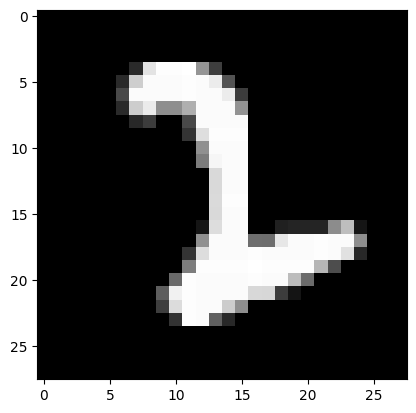

Prediction:  [8]
Label:  8


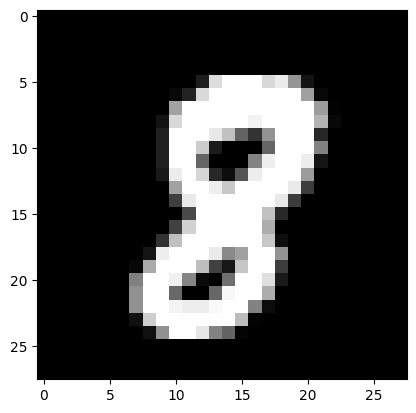

Prediction:  [1]
Label:  1


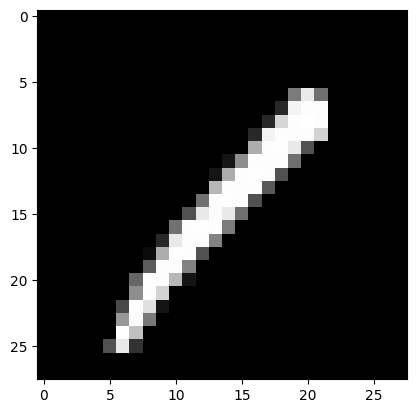

Prediction:  [4]
Label:  4


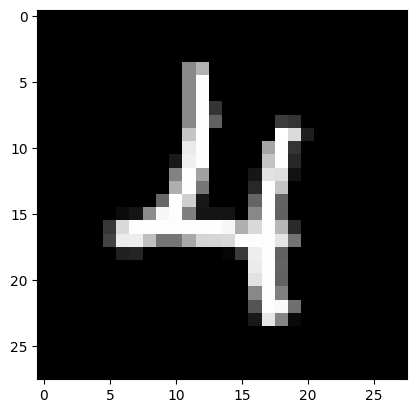

In [87]:
test_prediction(0, W1, b1, W2, b2)
test_prediction(1, W1, b1, W2, b2)
test_prediction(2, W1, b1, W2, b2)
test_prediction(3, W1, b1, W2, b2)

# 